building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


building tree 3 of 10
building tree 4 of 10


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.5s


building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10


[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.9s


building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Training set score: 0.999190


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Test set score: 0.926061


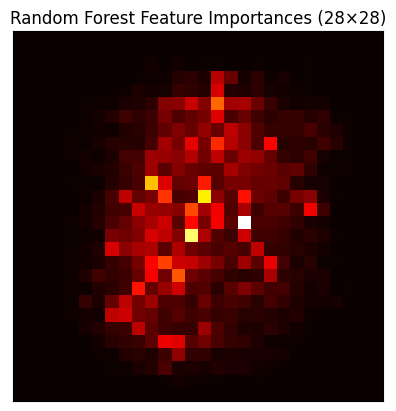

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X = X / 255.0 #Normiert die Pixelwerte (0–255) auf den Bereich 0–1 für stabileres Training.

# Split data into train partition (30%) and test partition (70%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

rf = RandomForestClassifier(
    n_estimators=10,        #number of trees
    min_samples_leaf=1,
    n_jobs=1,               #number of CPU cores (1= single core use -slow)
    random_state=0,
    verbose=10,
)
rf.fit(X_train, y_train)

print(f"Training set score: {rf.score(X_train, y_train):.6f}")
print(f"Test set score: {rf.score(X_test, y_test):.6f}")

imp = rf.feature_importances_
fig, ax = plt.subplots()
ax.matshow(imp.reshape(28, 28), cmap=plt.cm.hot)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Random Forest Feature Importances (28×28)")
plt.show()

#Bright/yellow areas = pixels with high importance for decision making.
#Dark areas = pixels the model basically ignores.